In [1]:
# This project aims at classifying traffic signs.
# The dataset used comes from Kaggle and contains more than 
# 50 000 images classified into 43 different classes.
# The dataset is quite varying, some classes have many images,
# while others have few images. There are two folders : 
# the train folder with training images in it and the test folder 
# with images that will be used for testing.

In [8]:
#!pip install opendatasets

In [3]:
#import opendatasets as od

In [7]:
#od.download("https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

# Import libraries

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
#import pandas as pd
import tensorflow as tf
#from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Explore the dataset

In [2]:
training_dataset_name = 'gtsrb-german-traffic-sign\Train'
data = []
labels = []
classes = 43
current_path = os.getcwd()

for i in range(classes):
    path = os.path.join(current_path, training_dataset_name,str(i))
    list_of_images = os.listdir(path)
    
    for image_name in list_of_images:        
        path_to_image = os.path.join(path, image_name)
        #print(f'classe = {i}, Image = {path_to_image}')        
        try:            
            image = Image.open(path_to_image)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
    
data = np.array(data)
labels = np.array(labels)

In [9]:
print(data.shape, labels.shape)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(f'Training data  = {X_train.shape}')
print(f'Training labels = {y_train.shape}')
print(f'Validation data  = {X_test.shape}')
print(f'Validation labels = {y_test.shape}')

print(X_train.shape[1:])
#y_train = to_categorical(y_train, classes)
#y_test = to_categorical(y_test, classes)

(39209, 30, 30, 3) (39209,)
Training data  = (31367, 30, 30, 3)
Training labels = (31367,)
Validation data  = (7842, 30, 30, 3)
Validation labels = (7842,)
(30, 30, 3)


# Build CNN model

In [16]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]),
    Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Flatten(),
    Dense(units=256, activation='relu'),
    Dropout(rate=0.25),
    Dense(classes, activation='softmax')
])

In [17]:
# model.summary()

In [18]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
epochs = 15
batch_size = 64
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
491/491 [==============================] - 67s 135ms/step - loss: 1.9216 - accuracy: 0.5247 - val_loss: 0.5325 - val_accuracy: 0.8743
Epoch 2/15
491/491 [==============================] - 71s 145ms/step - loss: 0.5538 - accuracy: 0.8429 - val_loss: 0.1857 - val_accuracy: 0.9584
Epoch 3/15
491/491 [==============================] - 70s 143ms/step - loss: 0.3500 - accuracy: 0.8977 - val_loss: 0.1087 - val_accuracy: 0.9704
Epoch 4/15
491/491 [==============================] - 67s 136ms/step - loss: 0.2646 - accuracy: 0.9220 - val_loss: 0.1022 - val_accuracy: 0.9725
Epoch 5/15
491/491 [==============================] - 71s 144ms/step - loss: 0.2256 - accuracy: 0.9349 - val_loss: 0.0761 - val_accuracy: 0.9786
Epoch 6/15
491/491 [==============================] - 67s 137ms/step - loss: 0.1942 - accuracy: 0.9433 - val_loss: 0.0503 - val_accuracy: 0.9874
Epoch 7/15
491/491 [==============================] - 66s 134ms/step - loss: 0.1683 - accuracy: 0.9501 - val_loss: 0.0439 - val_ac

# plot learning curves

Text(0.5, 1.0, 'Loss')

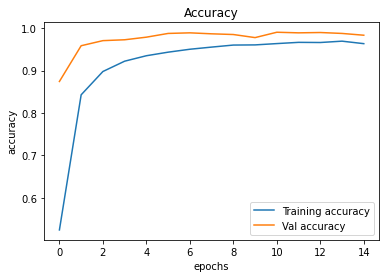

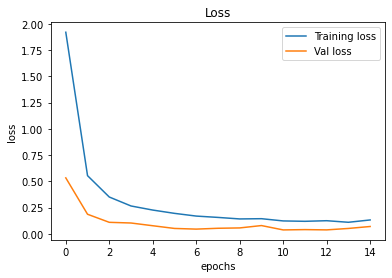

In [20]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('Accuracy')

plt.figure(1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Loss')

# Test the model

In [21]:
from sklearn.metrics import accuracy_score
import pandas as pd

In [47]:
data_folder = 'gtsrb-german-traffic-sign'
y_test = pd.read_csv(os.path.join(current_path, data_folder, 'Test.csv'))

labels = y_test['ClassId'].values
imgs = y_test['Path'].values

test_data = []

for img in imgs:
    path_to_image = os.path.join(current_path, data_folder, img)
    
    image = Image.open(path_to_image)
    image = image.resize((30, 30))
    image = np.array(image)
    test_data.append(image)
    
X_test = np.array(test_data)

pred = model.predict(X_test)

pred_classes = np.argmax(pred, axis=1)
pred_score = np.max(pred, axis=1)

0.9482185273159145

In [48]:
# test accuracy
accuracy_score(labels, pred_classes)

0.9482185273159145

In [49]:
model.save('traffic_signs_classifier.h5')

# Make a GUI

In [57]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('traffic_signs_classifier.h5')

#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')

label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    #pred = model.predict_classes([image])[0]
    pred = np.argmax(model.predict([image])[0])
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

No vehicles
Priority road
No passing veh over 3.5 tons
End of no passing
No entry
Stop
Roundabout mandatory
